# Project 7<br><span style='color:coral'>**Feature Engineering**
Name of the contributer : Rajeev Vhanhuve

**DESCRIPTION**<br>
While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.
Using the dataset, find the factors that influence price negotiations while buying a house.
There are 79 explanatory variables describing every aspect of residential homes in Ames, Iowa.
Note: 
1)	Download the “PEP1.csv” using the link given in the Feature Engineering project problem statement
2)	For a detailed description of the dataset, you can download and refer to data_description.txt using the link given in the Feature Engineering project problem statement

Perform the following steps:
1. Understand the dataset:
   1. Identify the shape of the dataset
   2. Identify variables with null values
   3. Identify variables with unique values
2. Generate a separate dataset for numerical and categorical variables
3. EDA of numerical variables:
   1. Missing value treatment
   2. Identify the skewness and distribution
   3. Identify significant variables using a correlation matrix 
   4. Pair plot for distribution and density
4. EDA of categorical variables
   1. Missing value treatment
   2. Count plot and box plot for bivariate analysis
   3. Identify significant variables using p-values and Chi-Square values
5. Combine all the significant categorical and numerical variables
6. Plot box plot for the new dataset to find the variables with outliers
Note: The last two points are performed to make the new dataset ready for training and prediction.

# <span style='color:coral'>**Solution**

#### Importing Libraries
- Pandas is a Python library for data manipulation and analysis.
- Numpy is a package that contains a multidimensional array object and several derivative ones.
- Matplotlib is a Python visualization package for 2D array plots.
- Seaborn is built on top of Matplotlib. It's used for exploratory data analysis and data visualization.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**<br>
Before reading data from a csv file, you need to download the "PEP1.csv" dataset from the resource section and upload it into the Lab. We will use the Up arrow icon, which is shown on the left side under the View icon. Click on the Up arrow icon and upload the file from wherever it was downloaded into your system.

After this, you will see the downloaded file will be visible on the left side of your lab with all the .pynb files.

In [2]:
df = pd.read_csv("PEP1.csv")

In [3]:
# Print first 2 lines of the dataset.
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### 1. Understand the dataset:

In [4]:
#Printing the name of the columns.
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

##### A. Identify the shape of the dataset.

In [5]:
df.shape

(1460, 81)

In [6]:
# Print all the other important information about the DataFrame, such as Datatype and Count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### B. Identify variables with null values.

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Printing total count of Null values.
print(df.isnull().sum().sum())

6965


##### C. Identify variables with unique values.

In [9]:
# Printing the unique values.
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" - "*40)

Id : [   1    2    3 ... 1458 1459 1460]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  5

#### 2. Generate a separate dataset for numerical and categorical variables.

In [10]:
# Creating dataset of numerical variables.
numeric_df= df.select_dtypes(include=[np.number])
numericcol=numeric_df.columns.tolist()
print ("Numeric :",numericcol)

Numeric : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [11]:
# Visualize the numerical variables dataset.
numeric_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [12]:
# Creating dataset of category variables dataset.
category_df=df.select_dtypes(exclude=[np.number])
categorycol=category_df.columns.tolist()
print ("Category :",categorycol)

Category : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
# Visualize the Category dataset.
category_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

#### 3. EDA of numerical variables:

In [14]:
#For describing entire numerical variable dataset.
numeric_df = pd.DataFrame(numeric_df)  
numeric_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

##### A. Missing value treatment.

In [15]:
# Checking numerical variables columns null values.
numeric_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

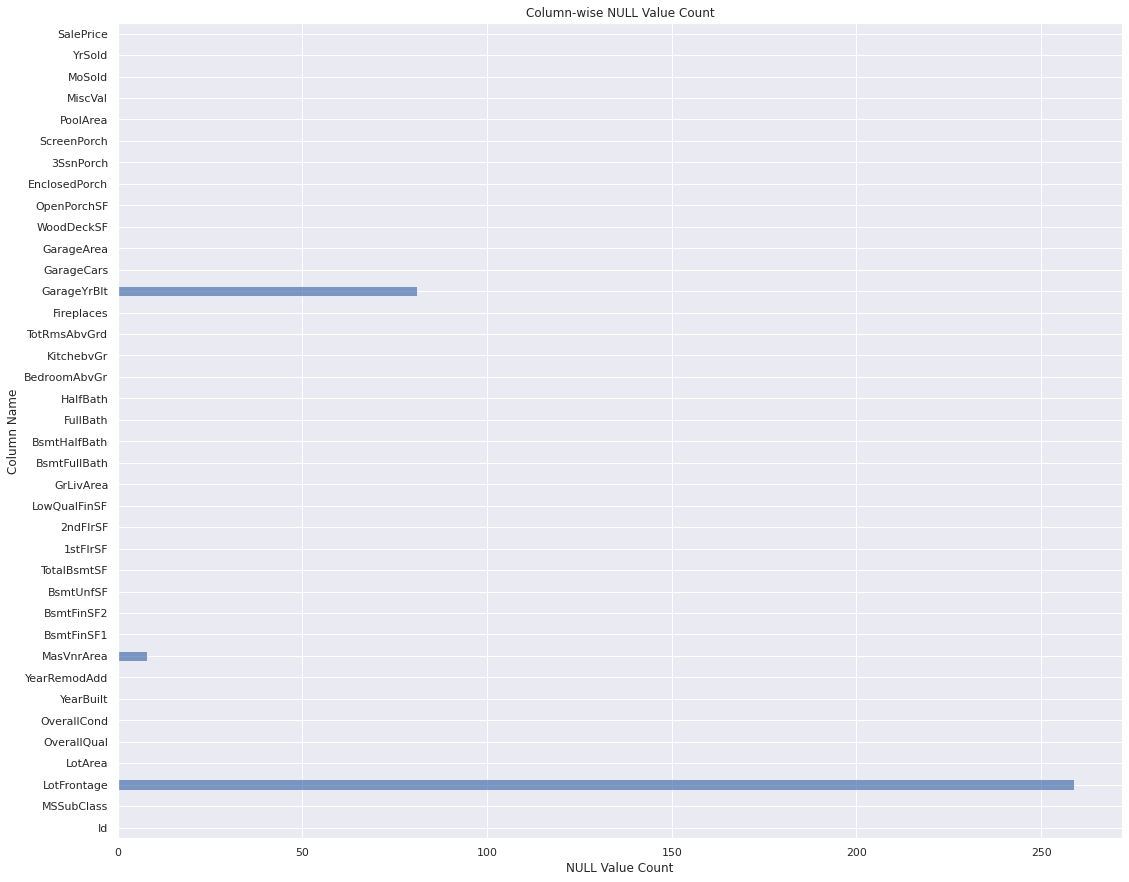

In [16]:
# Draw a frequency plot to show the number of null values in each column of the DataFrame.
sns.set()
numeric_df.isnull().sum().plot(kind='barh', alpha= 0.7, figsize= (18,15), title="Column-wise NULL Value Count")
plt.xlabel('NULL Value Count')
plt.ylabel('Column Name')
plt.show()

##### <span style='color:green'>Observations:
<span style='color:green'>- The bar shows the NA values in the columns.<br>
<span style='color:green'>- Most of the columns, from `LotFrontage`, `GarageYrBlt` and `MasVnrArea`have a large number of null values.

In [17]:
# Let's impute the NA value with ZERO.
numeric_df.fillna('0', inplace= True)

In [18]:
# rechecking column null values.
numeric_df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

##### B. Identify the skewness and distribution.

This is formatted as code
Skewness is a distortion or asymmetry in a set of data that deviates from the symmetrical bell curve, or normal distribution.

In [19]:
# Checking the skewness of entire data.
numeric_df.skew(axis = 0, skipna = True)

Id                0.000000
MSSubClass        1.407657
LotFrontage       0.267822
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.869501
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

##### C. Identify significant variables using a correlation matrix.

In [20]:
# Checking skewness and kurtosis of SalePrice.
print("Skewness: %f" % numeric_df['SalePrice'].skew())

Skewness: 1.882876


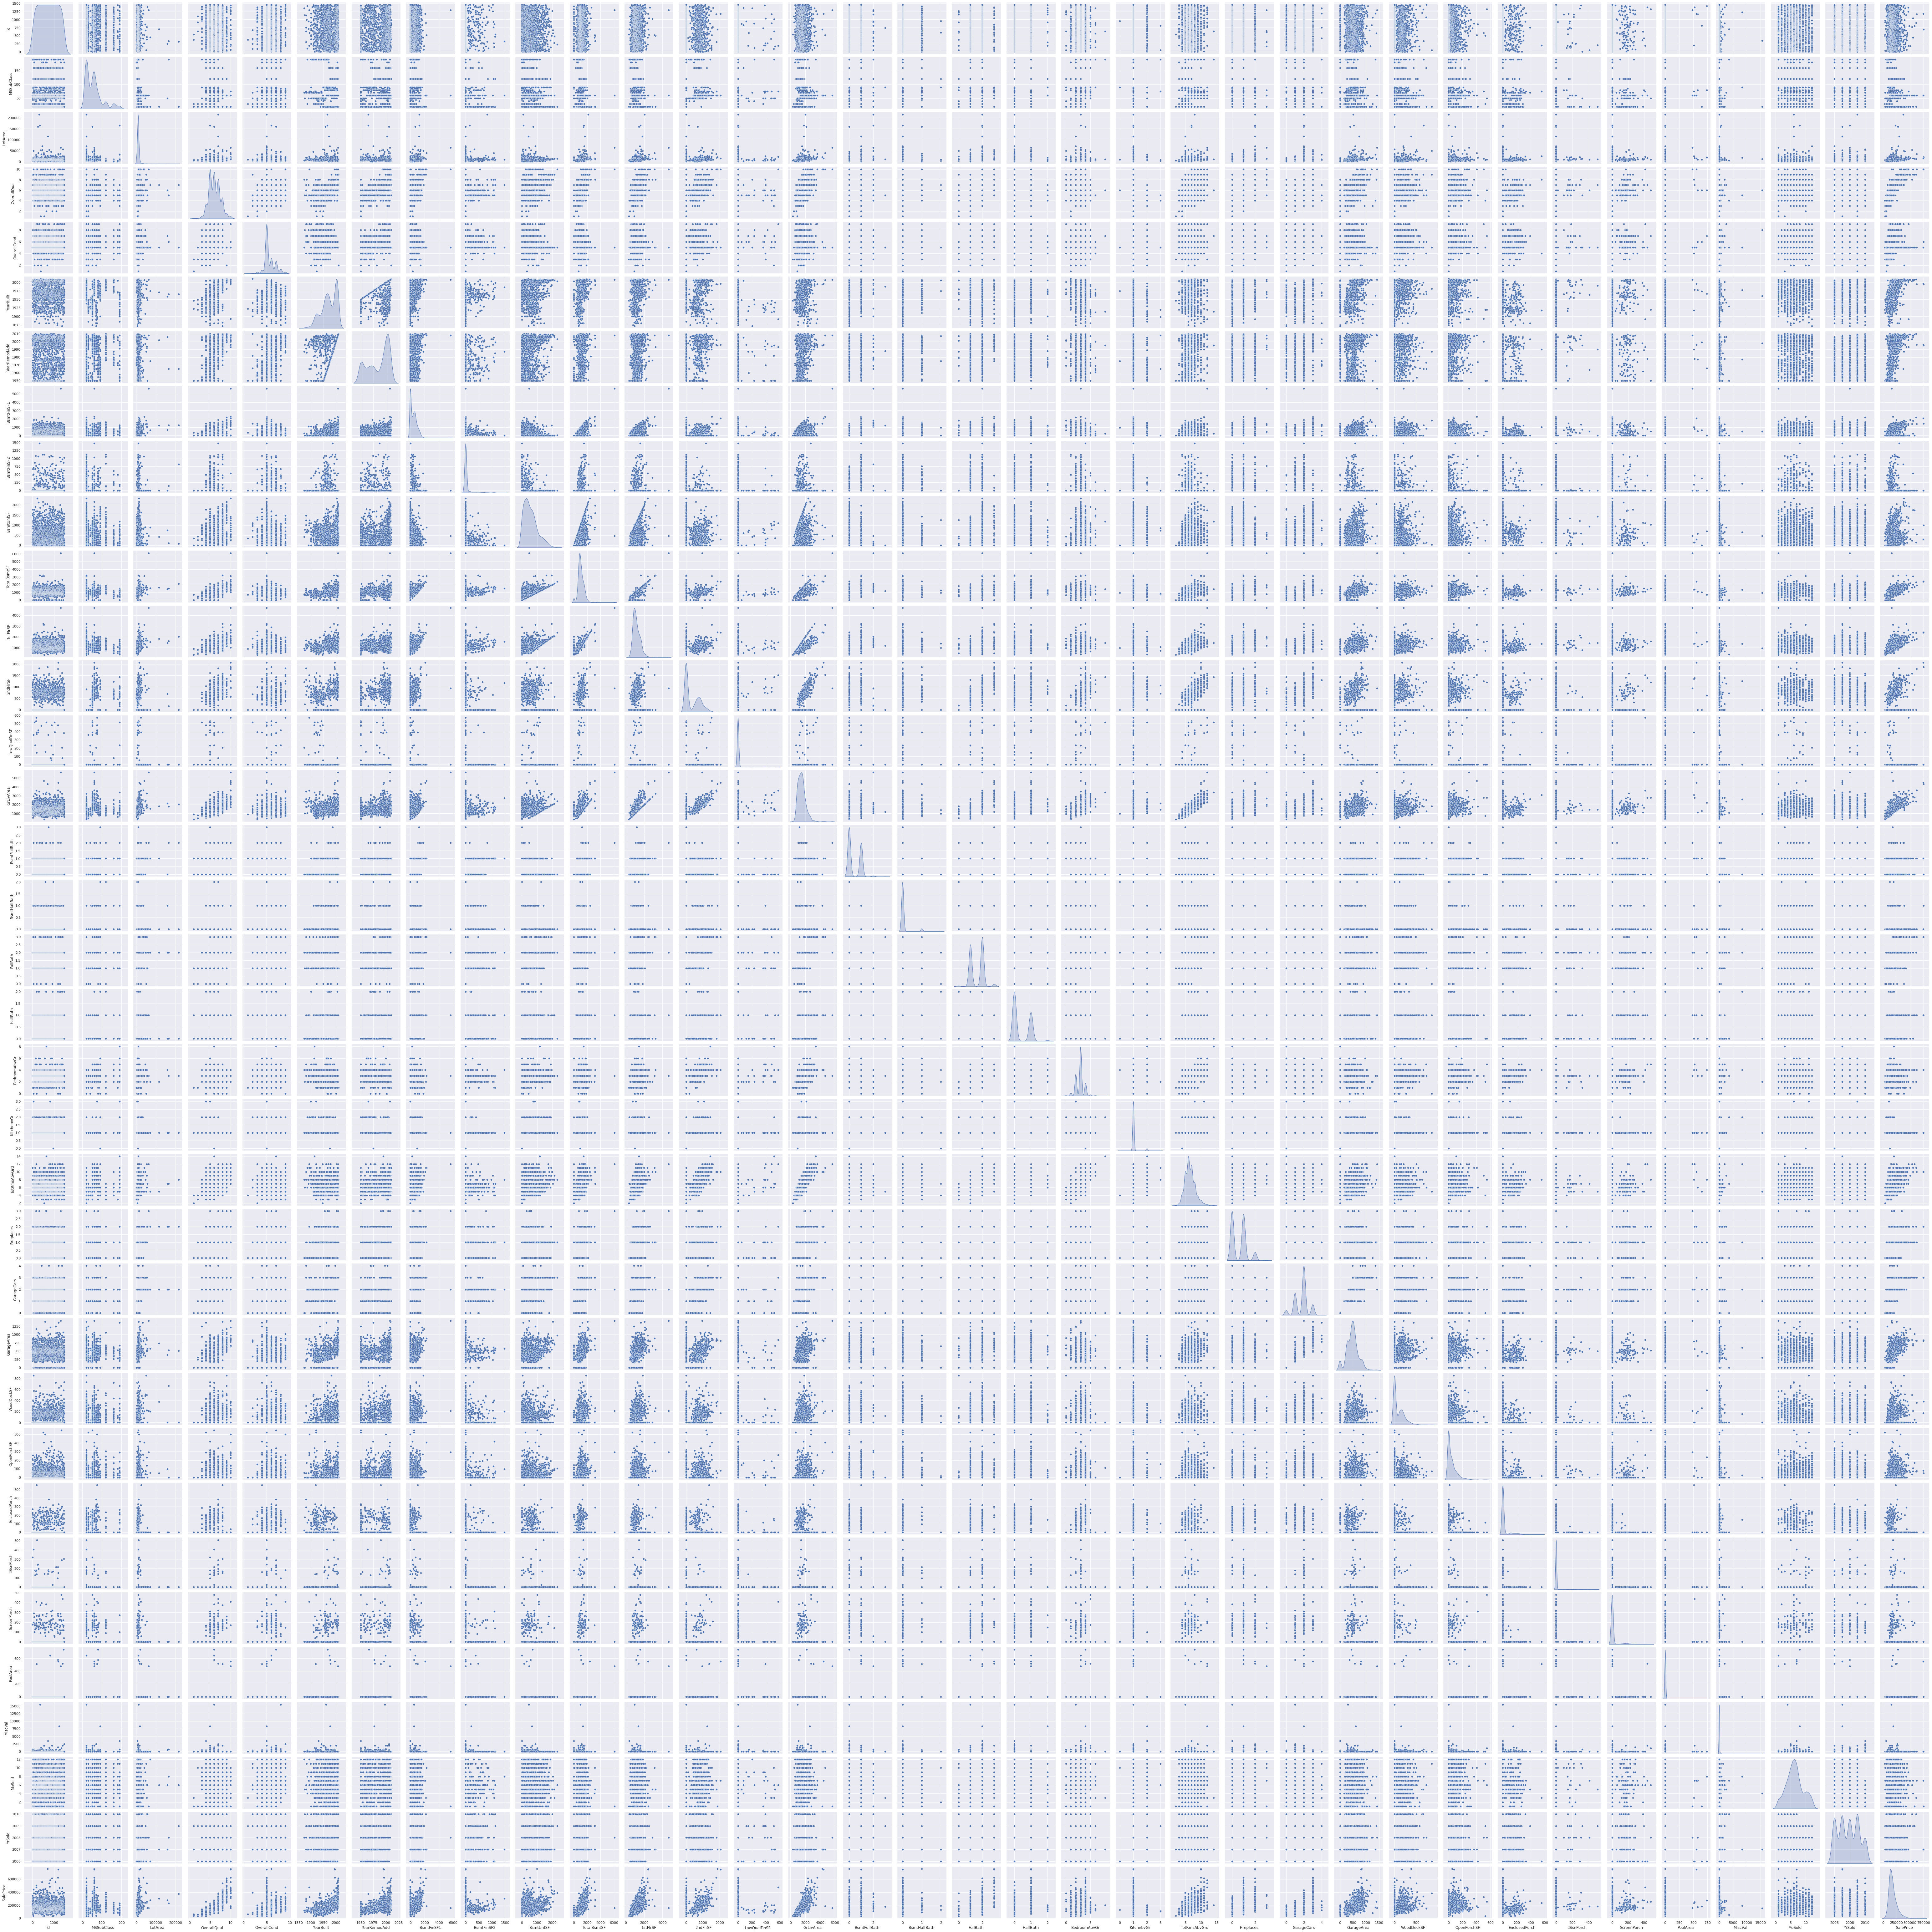

In [21]:
# Pair plotting the variables to check their distribution and relationship.
pp = sns.pairplot(numeric_df, diag_kind="kde")

<span style='color:green'>**Inference:**<br> The pair plot and skewness values of the variables tell that the dataset is not normally distributed. Therefore, we need to normalize it.<br>
<span style='color:green'>Next step is to find the correlation and identifying the factors that affect the SalePrice.

Relationship between saleprice and numerical variables.<br>
**Correlation**<br>
*Correlation simply means association, and it is a measure of how closely two variables are related.*

In [22]:
# Code to find correlation.
corr = numeric_df.corr()
corr.style.background_gradient(cmap='coolwarm')

<span style='color:green'>**Inference:**<br>
Let us identify the variables, with threshold  ≥ 0.7 or  ≤ -0.7, that have high negative and positive correlation with<br> **SalePrice:**<br>
OverallQual<br>
GrLivArea


<span style='color:green'>We identified only two variables out of 37 numerical variables. This amounts to a relatively less number of variables therefore, we will reduce the threshold for positive and negative correlation to 0.5.

<span style='color:green'>List of variables:

<span style='color:green'>-OverallQual<br>
<span style='color:green'>-GrLivArea<br>
<span style='color:green'>-YearBuilt<br>
<span style='color:green'>-YearRemodAdd<br>
<span style='color:green'>-TotalBsmtSF<br>
<span style='color:green'>-1stFlrSF<br>
<span style='color:green'>-FullBath<br>
<span style='color:green'>-TotRmsAbvGrd<br>
<span style='color:green'>-GarageCars<br>
<span style='color:green'>-GarageArea

##### D. Pair plot for distribution and density.

*A pairs plot shows the distribution of single variables as well as the relationships between them.*

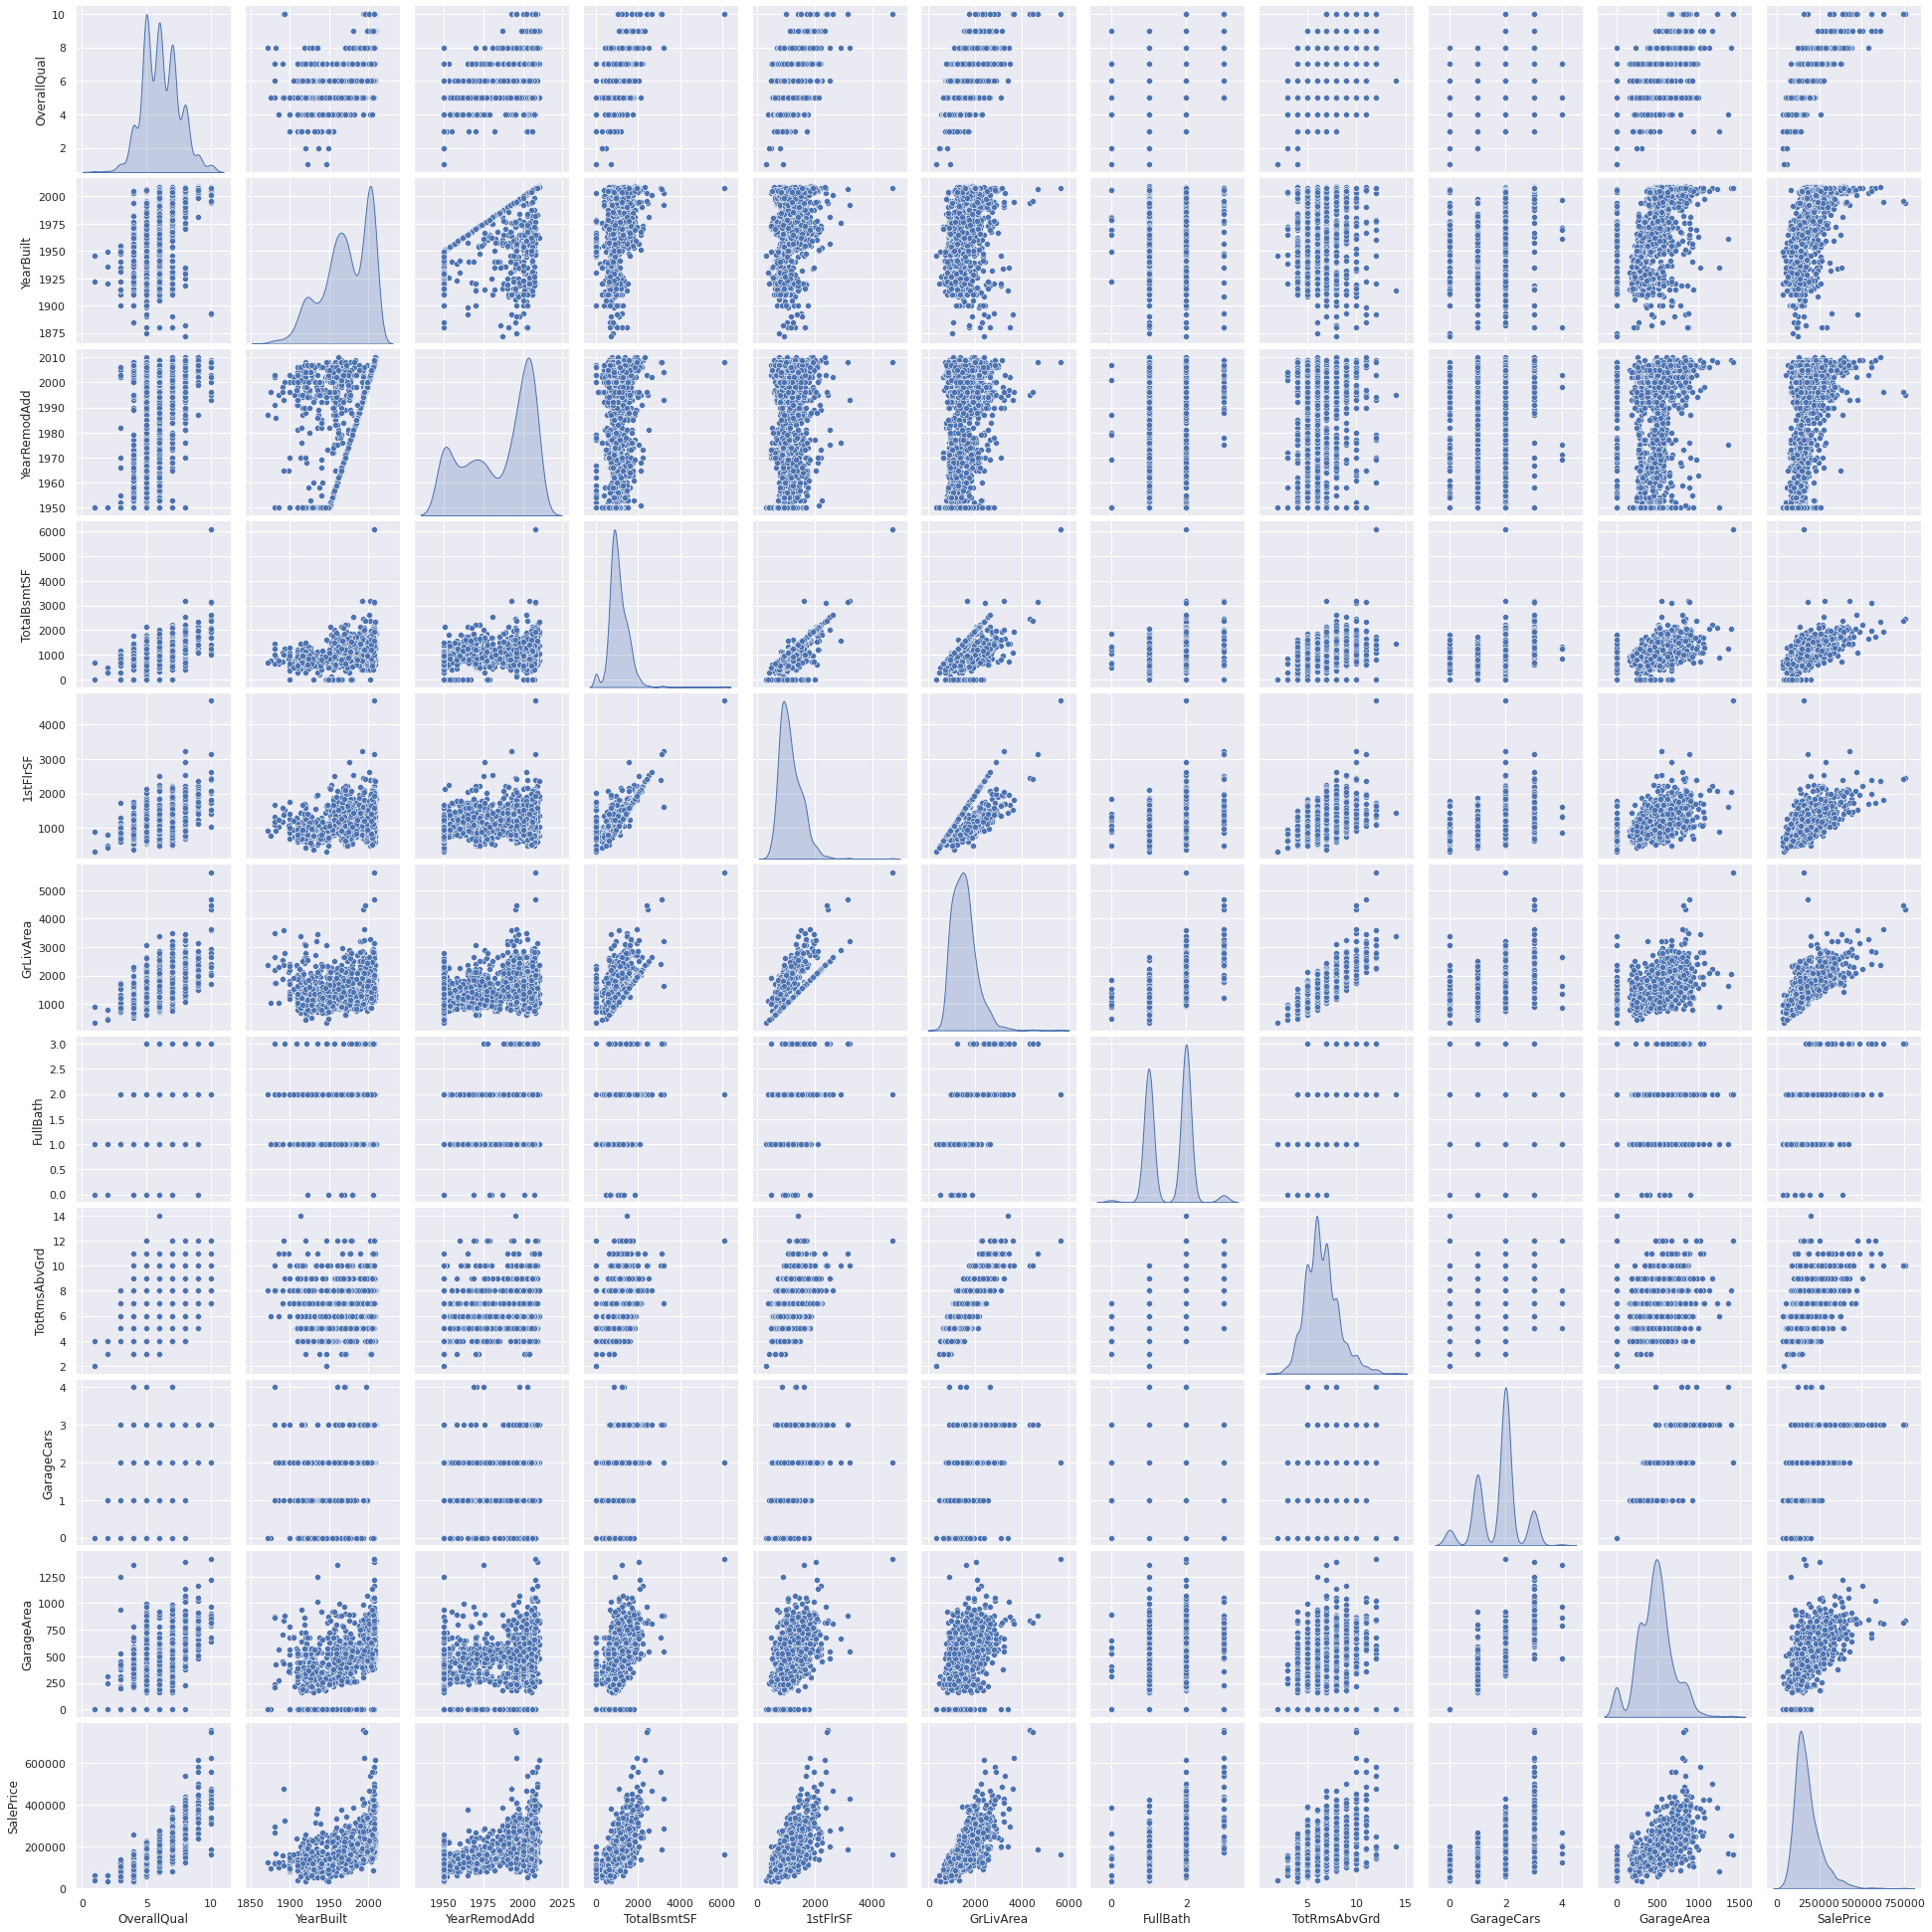

In [23]:
# Code to Pair plot the significant variables to check their distribution and relationship in accordance to "GarageCars".
IV_PP = sns.pairplot(numeric_df, vars=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                                'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','SalePrice'],diag_kind="kde")

<span style='color:green'>**Dropping independent variables**

<span style='color:green'>Drop **YearRemodAdd:**<br>
<span style='color:green'>In the above pair plot, the relationship of **YearRemodAdd** with **SalePrice** has a high resemblance to that of **YearBuilt** with **SalePrice**.

<span style='color:green'>Drop **1stFlrSF:**<br>
<span style='color:green'>In the above pair plot, the relationship of **1stFlrSF** with **SalePrice** has a high resemblance to that of **TotalBsmtSF** with **SalePrice**.

<span style='color:green'>Drop **TotRmsAbvGrd:**<br>
<span style='color:green'>In the above correlation plot, **TotRmsAbvGrd** is highly correlated to **GrLivArea**. Therefore, we will drop **TotRmsAbvGrd**.

<span style='color:green'>Drop **GarageArea:**<br>
<span style='color:green'>In the above correlation plot, **GarageArea** is highly correlated to **GarageCars**. Therefore, we will drop **GarageArea**.

#### 4.	EDA of categorical variables.

##### A. Missing value treatment.

In [24]:
# Checking numerical variables columns null values.
category_df.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [25]:
# Dropping variables with missing values.
# Identifying all the variables which contain missing values.
category_df_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])

na_data = pd.DataFrame()

for c in category_df.columns:
    na_data['column'] = [c]
    na_data['Missing Value'] = category_df[c].isnull().sum()
    na_data['Missing Value %'] = (category_df[c].isnull().sum()/len(category_df)).round(3)*100
    category_df_stats = category_df_stats.append(na_data)
    
category_df_stats

column num_miss pct_miss  Missing Value  Missing Value %
0       MSZoning      NaN      NaN            0.0              0.0
0         Street      NaN      NaN            0.0              0.0
0          Alley      NaN      NaN         1369.0             93.8
0       LotShape      NaN      NaN            0.0              0.0
0    LandContour      NaN      NaN            0.0              0.0
0      Utilities      NaN      NaN            0.0              0.0
0      LotConfig      NaN      NaN            0.0              0.0
0      LandSlope      NaN      NaN            0.0              0.0
0   Neighborhood      NaN      NaN            0.0              0.0
0     Condition1      NaN      NaN            0.0              0.0
0     Condition2      NaN      NaN            0.0              0.0
0       BldgType      NaN      NaN            0.0              0.0
0     HouseStyle      NaN      NaN            0.0              0.0
0      RoofStyle      NaN      NaN            0.0              0.0
0       RoofMatl      NaN      NaN            0.0              0.0
0    Exterior1st      NaN      NaN            0.0              0.0
0    Exterior2nd      NaN      NaN            0.0              0.0
0     MasVnrType      NaN      NaN            8.0              0.5
0      ExterQual      NaN      NaN            0.0              0.0
0      ExterCond      NaN      NaN            0.0              0.0
0     Foundation      NaN      NaN            0.0              0.0
0       BsmtQual      NaN      NaN           37.0              2.5
0       BsmtCond      NaN      NaN           37.0              2.5
0   BsmtExposure      NaN      NaN           38.0              2.6
0   BsmtFinType1      NaN      NaN           37.0              2.5
0   BsmtFinType2      NaN      NaN           38.0              2.6
0        Heating      NaN      NaN            0.0              0.0
0      HeatingQC      NaN      NaN            0.0              0.0
0     CentralAir      NaN      NaN            0.0              0.0
0     Electrical      NaN      NaN            1.0              0.1
0    KitchenQual      NaN      NaN            0.0              0.0
0       Functiol      NaN      NaN            0.0              0.0
0    FireplaceQu      NaN      NaN          690.0             47.3
0     GarageType      NaN      NaN           81.0              5.5
0   GarageFinish      NaN      NaN           81.0              5.5
0     GarageQual      NaN      NaN           81.0              5.5
0     GarageCond      NaN      NaN           81.0              5.5
0     PavedDrive      NaN      NaN            0.0              0.0
0         PoolQC      NaN      NaN         1453.0             99.5
0          Fence      NaN      NaN         1179.0             80.8
0    MiscFeature      NaN      NaN         1406.0             96.3
0       SaleType      NaN      NaN            0.0              0.0
0  SaleCondition      NaN      NaN            0.0              0.0

<span style='color:green'>**Inference:**

<span style='color:green'>Variables with a large percentage of missing values are identified. Let us drop them from the dataset.

<span style='color:green'>List of variables with large number of missing values:

<span style='color:green'>MiscFeature<br>
<span style='color:green'>Fence<br>
<span style='color:green'>PoolQC<br>
<span style='color:green'>FireplaceQu<br>
<span style='color:green'>Alley

In [26]:
# Dropping variables which contain large number of missing values.
category_df = category_df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley',],axis=1)

In [27]:
# Removing missing values.
category_df.dropna(inplace=True)
category_df.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [28]:
# Shape is an attribute which returns a tuple representing the dimensionality of the DataFrame.
# Shape is used to define no. of rows and no. of columns in dataframe.
print(category_df.head(2))
print(('-')*128)
print(category_df.shape)

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functiol  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd      Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA      Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  

[2 rows x 38 columns]
--------------------------------------------------------------------------------------------------------------------------------
(1338, 38)


##### B. Count plot and box plot for bivariate analysis.

Relationship between saleprice and categorical variables.<br>
Let us analyze the relationship of categorical variables with the dependent variable SalePrice via box plots and plotting the count plots as well.

In [29]:
# Adding SalePrice to the category_df.
category_df['SalePrice'] = df.loc[category_df.index, 'SalePrice'].copy()
category_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functiol GarageType  \
0      CollgCr       Norm       Norm  ...          Gd      Typ     Attchd   
1      Veenker      Feedr       Norm  ...          TA      Typ     Attchd   
2      CollgCr       Norm       Norm  ...          Gd      Typ     Attchd   
3      Crawfor       Norm       Norm  ...          Gd      Typ     Detchd   
4      NoRidge       Norm       Norm  ...          Gd      Typ     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 39 columns]

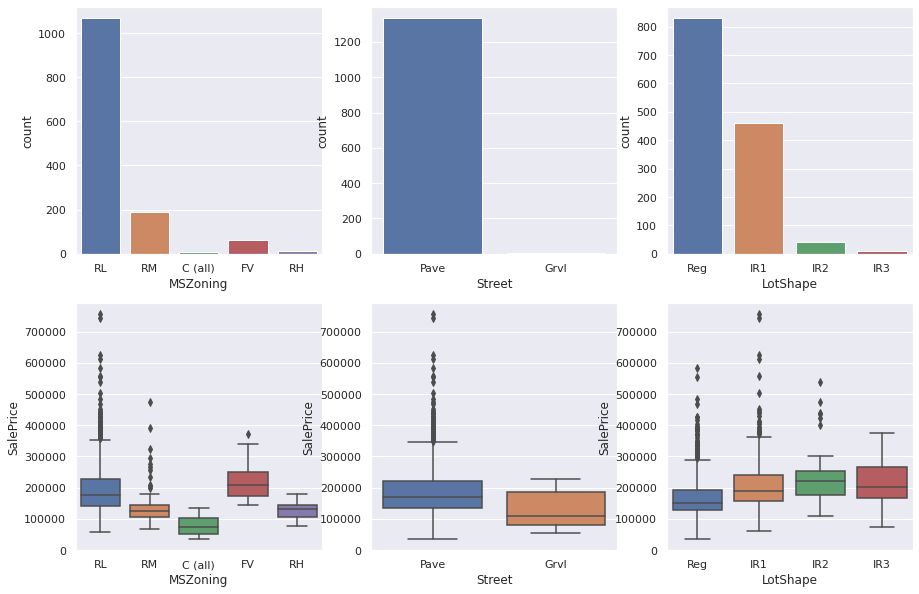

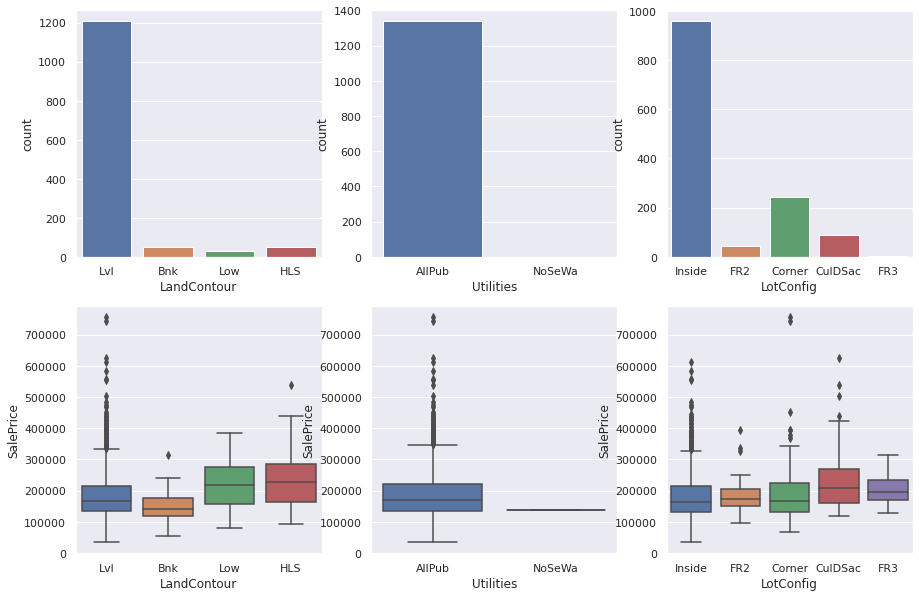

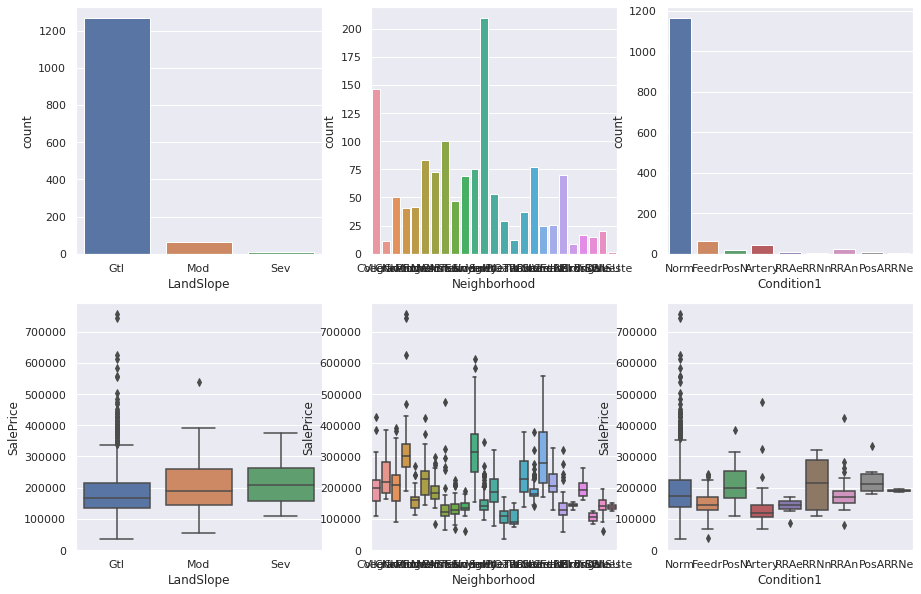

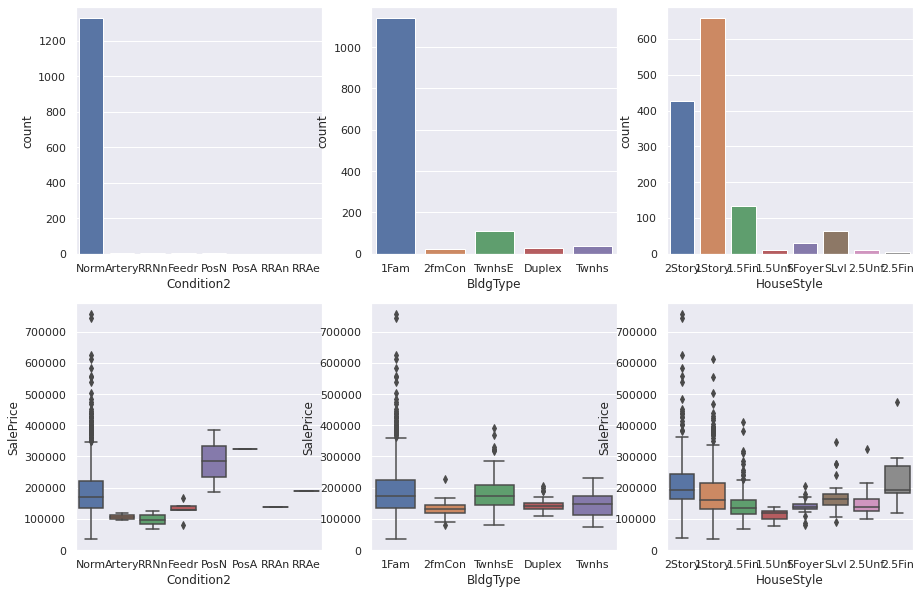

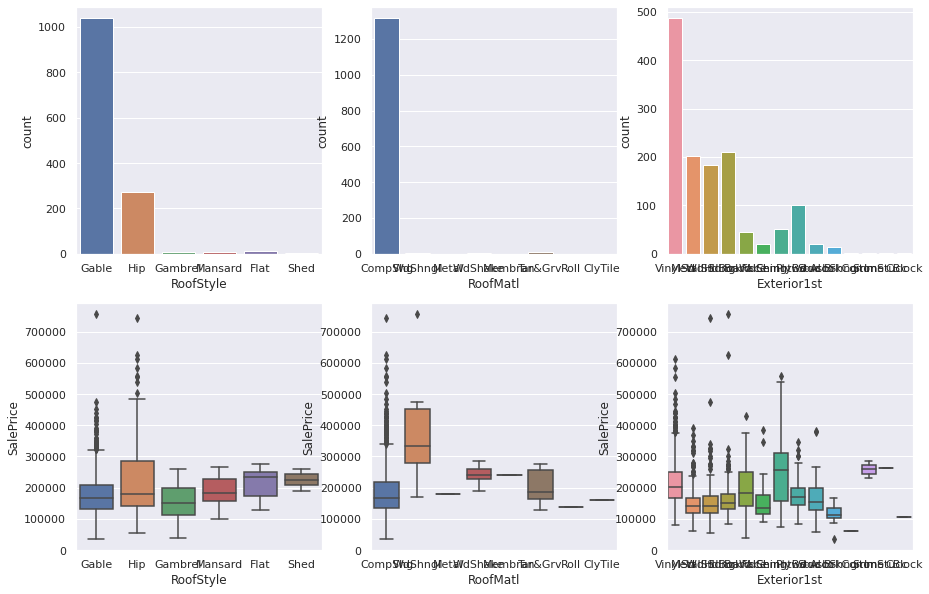

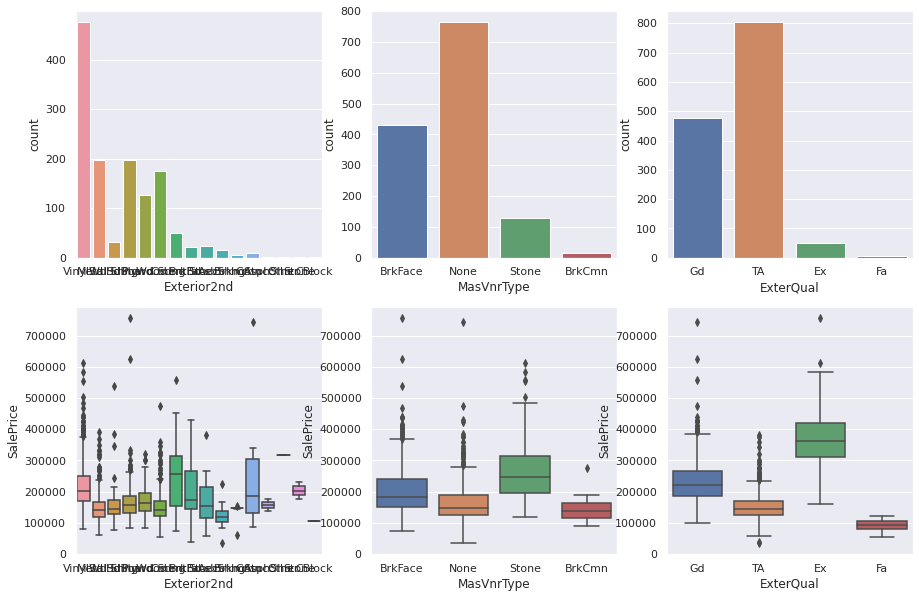

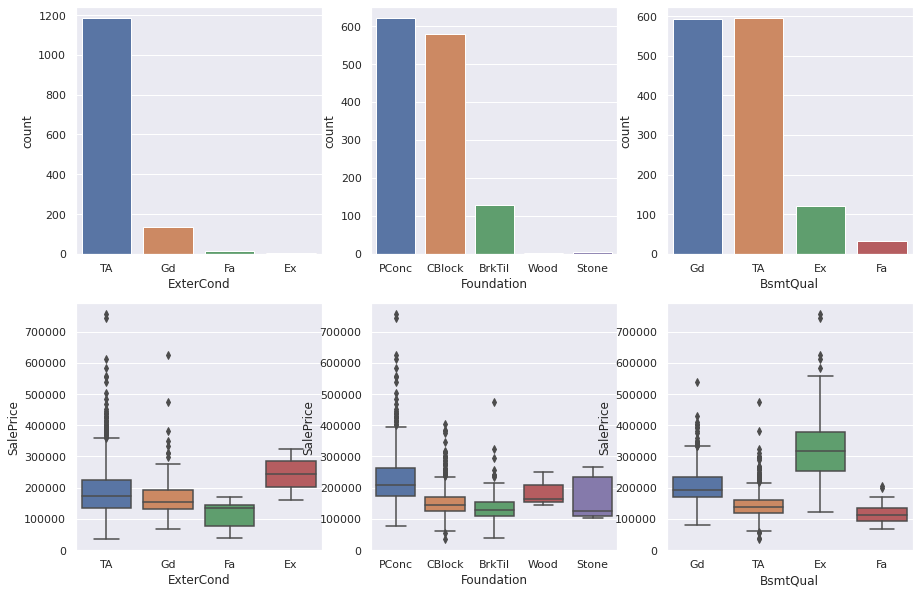

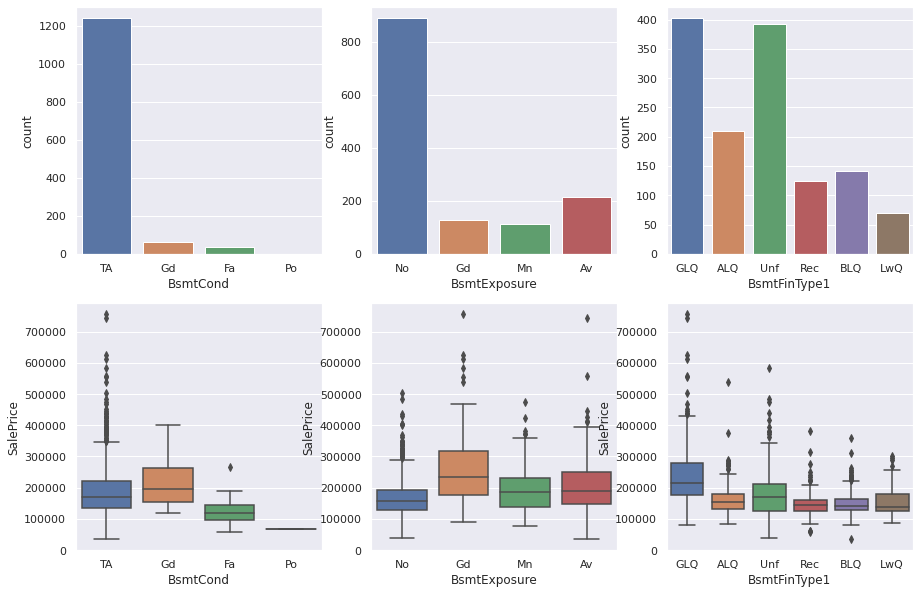

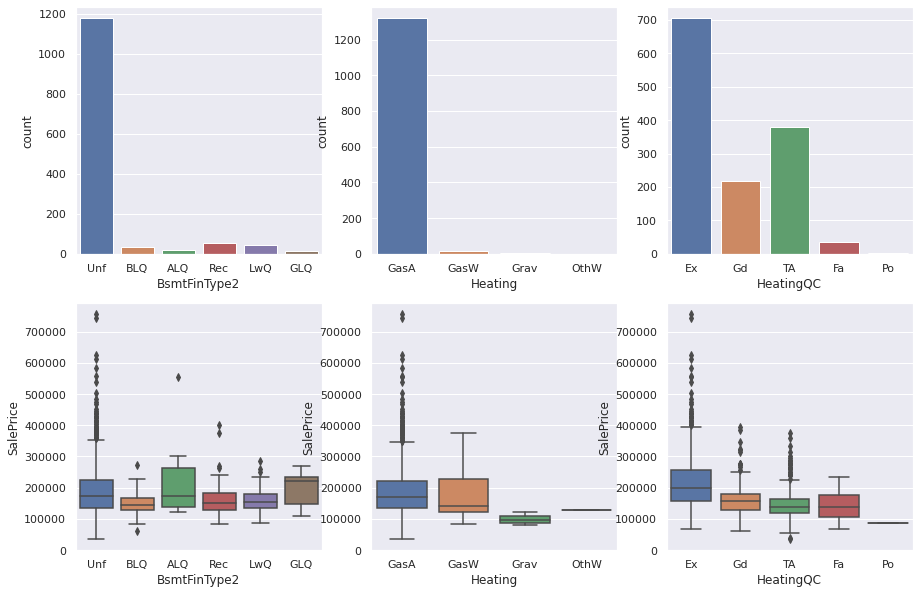

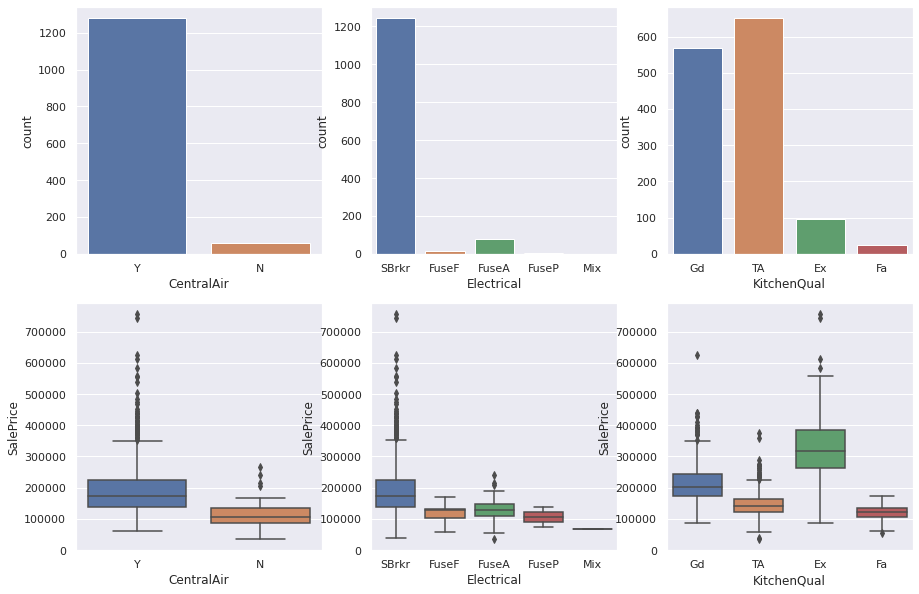

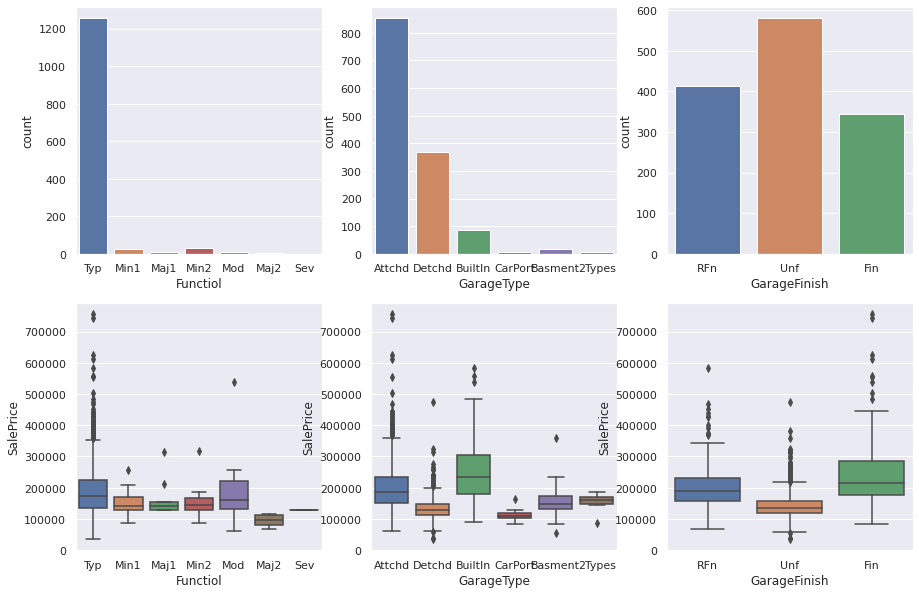

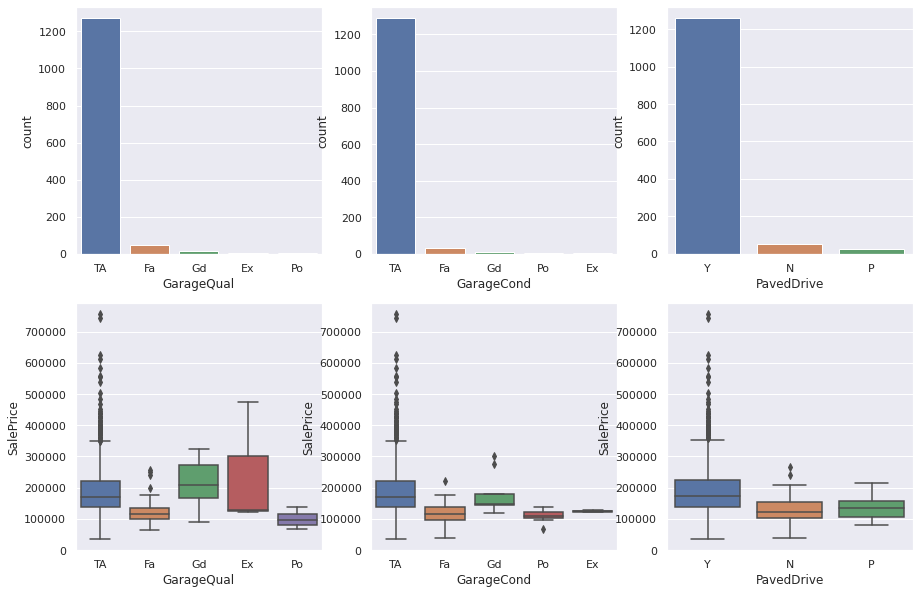

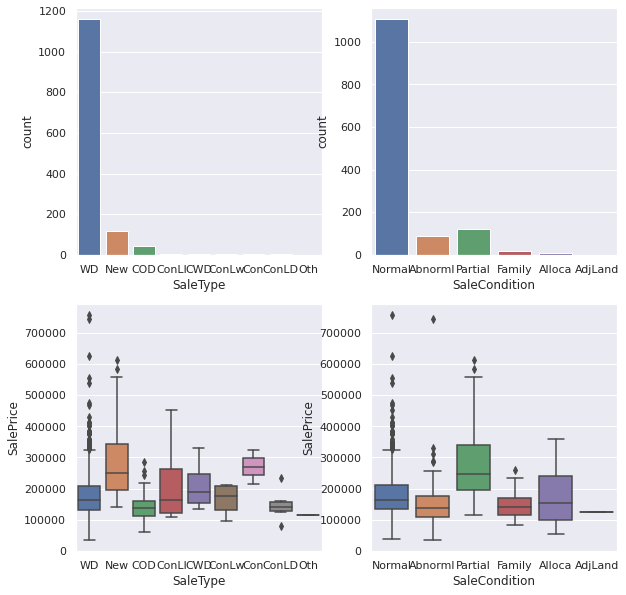

<Figure size 1080x720 with 0 Axes>

In [30]:
# Function to plot all independent categorical variables with SalePrice and count plot.
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(category_df.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = category_df, x=c, ax = ax1) #For countplot.
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=category_df, x=c, y='SalePrice', ax=ax2) #For boxplot.
                        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

<span style='color:green'>**Inference:**

<span style='color:green'>All the categorical variables have outliers and require outlier treatment.<BR>
<span style='color:green'>The data is heavily skewed.

#### C. Identify significant variables using p-values and Chi-Square values.

In [31]:
df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [32]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1338 non-null   object
 1   Street         1338 non-null   object
 2   LotShape       1338 non-null   object
 3   LandContour    1338 non-null   object
 4   Utilities      1338 non-null   object
 5   LotConfig      1338 non-null   object
 6   LandSlope      1338 non-null   object
 7   Neighborhood   1338 non-null   object
 8   Condition1     1338 non-null   object
 9   Condition2     1338 non-null   object
 10  BldgType       1338 non-null   object
 11  HouseStyle     1338 non-null   object
 12  RoofStyle      1338 non-null   object
 13  RoofMatl       1338 non-null   object
 14  Exterior1st    1338 non-null   object
 15  Exterior2nd    1338 non-null   object
 16  MasVnrType     1338 non-null   object
 17  ExterQual      1338 non-null   object
 18  ExterCond      1338 non-null

Import necessary packages<BR>
SciPy, a scientific Python library, is open-source, BSD-licensed math, science, and engineering library. NumPy, which provides convenient and quick N-dimensional array manipulation, is used by the SciPy package.

*Identifying significant variables based on p-value and chi-square.*

In [33]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
# Function to determine p-value and perform chi-square test.
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value.
        self.chi2 = None #Chi-square Test Statistic.
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None

# Function to print the results of p-value and chi-square test.     
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
# Function to determine chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


# Initializing ChiSquare Class.
cT = ChiSquare(category_df)
# Perform Feature Selection.
testColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
               'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'GarageType',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','SalePrice']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SalePrice" ) 

MSZoning is IMPORTANT for Prediction
Street is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is NOT an important predictor. (Discard LotConfig from model)
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is IMPORTANT for Prediction
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is NOT an important predictor. (Discard HouseStyle from model)
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is NOT an important predictor. (Discard Exterior1st from model)
Exterior2nd is NOT an important predictor. (Discard Exterior2nd from model)
MasVnrT

<span style='color:green'>**Inference:**

<span style='color:green'>The following variables have significant Chi-square value and p-value  ≤  to 0.05:* OverallQual

<span style='color:green'> - MSZoning<BR>
<span style='color:green'> - Street<BR>
<span style='color:green'> - LotShape<BR>
<span style='color:green'> - Neighborhood<BR>
<span style='color:green'> - Condition2<BR>
<span style='color:green'> - MasVnrType<BR>
<span style='color:green'> - ExterQual<BR>
<span style='color:green'> - Foundation<BR>
<span style='color:green'> - BsmtQual<BR>
<span style='color:green'> - BsmtCond<BR>
<span style='color:green'> - BsmtExposure<BR>
<span style='color:green'> - CentralAir<BR>
<span style='color:green'> - Electrical<BR>
<span style='color:green'> - KitchenQual<BR>
<span style='color:green'> - GarageType<BR>
<span style='color:green'> - GarageFinish<BR>
<span style='color:green'> - GarageQual<BR>
<span style='color:green'> - SaleType<BR>
<span style='color:green'> - SaleCondition<BR>
<span style='color:green'> - SalePrice


In [34]:
#Keep significant variables.
category_df = category_df[['MSZoning','Street','LotShape','Neighborhood','Condition2','MasVnrType','ExterQual','Foundation',
                           'BsmtQual','BsmtCond','BsmtExposure','CentralAir','Electrical','KitchenQual','GarageType',
                           'GarageFinish','GarageQual','SaleType','SaleCondition','SalePrice']]

In [35]:
category_df.head()

MSZoning Street LotShape Neighborhood Condition2 MasVnrType ExterQual  \
0       RL   Pave      Reg      CollgCr       Norm    BrkFace        Gd   
1       RL   Pave      Reg      Veenker       Norm       None        TA   
2       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
3       RL   Pave      IR1      Crawfor       Norm       None        TA   
4       RL   Pave      IR1      NoRidge       Norm    BrkFace        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure CentralAir Electrical KitchenQual  \
0      PConc       Gd       TA           No          Y      SBrkr          Gd   
1     CBlock       Gd       TA           Gd          Y      SBrkr          TA   
2      PConc       Gd       TA           Mn          Y      SBrkr          Gd   
3     BrkTil       TA       Gd           No          Y      SBrkr          Gd   
4      PConc       Gd       TA           Av          Y      SBrkr          Gd   

  GarageType GarageFinish GarageQual SaleType SaleCondition  SalePrice  
0     Attchd          RFn         TA       WD        Normal     208500  
1     Attchd          RFn         TA       WD        Normal     181500  
2     Attchd          RFn         TA       WD        Normal     223500  
3     Detchd          Unf         TA       WD       Abnorml     140000  
4     Attchd          RFn         TA       WD        Normal     250000

#### 5. Combine all the significant categorical and numerical variables.

**Numerical Variables**

In [36]:
df.select_dtypes(include = 'number').head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [37]:
# Creating a dataset with significant numerical variables.
# number_df = df.select_dtypes(include = 'int').copy() # this is not correct - inlcude = 'number' is correct.
number_df = df.select_dtypes(include = 'number').copy()
number_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

<span style='color:green'>List of significant numerical variables

<span style='color:green'>SalePrice<br>
<span style='color:green'>OverallQual<br>
<span style='color:green'>GrLivArea<br>
<span style='color:green'>GarageCars<br>
<span style='color:green'>TotalBsmtSF<br>
<span style='color:green'>FullBath<br>
<span style='color:green'>YearBuilt<br>

In [38]:
#Keep significant variables.
number_df = number_df[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars','SalePrice']]
number_df.head()

OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  GarageCars  \
0            7       2003          856       1710         2           2   
1            6       1976         1262       1262         2           2   
2            7       2001          920       1786         2           2   
3            7       1915          756       1717         1           3   
4            8       2000         1145       2198         2           3   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

**Category Variables**

In [39]:
category_df.head()

MSZoning Street LotShape Neighborhood Condition2 MasVnrType ExterQual  \
0       RL   Pave      Reg      CollgCr       Norm    BrkFace        Gd   
1       RL   Pave      Reg      Veenker       Norm       None        TA   
2       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
3       RL   Pave      IR1      Crawfor       Norm       None        TA   
4       RL   Pave      IR1      NoRidge       Norm    BrkFace        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure CentralAir Electrical KitchenQual  \
0      PConc       Gd       TA           No          Y      SBrkr          Gd   
1     CBlock       Gd       TA           Gd          Y      SBrkr          TA   
2      PConc       Gd       TA           Mn          Y      SBrkr          Gd   
3     BrkTil       TA       Gd           No          Y      SBrkr          Gd   
4      PConc       Gd       TA           Av          Y      SBrkr          Gd   

  GarageType GarageFinish GarageQual SaleType SaleCondition  SalePrice  
0     Attchd          RFn         TA       WD        Normal     208500  
1     Attchd          RFn         TA       WD        Normal     181500  
2     Attchd          RFn         TA       WD        Normal     223500  
3     Detchd          Unf         TA       WD       Abnorml     140000  
4     Attchd          RFn         TA       WD        Normal     250000

In [40]:
number_df.head()

OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  GarageCars  \
0            7       2003          856       1710         2           2   
1            6       1976         1262       1262         2           2   
2            7       2001          920       1786         2           2   
3            7       1915          756       1717         1           3   
4            8       2000         1145       2198         2           3   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [41]:
# Combining the datasets.
House = pd.merge(category_df, number_df, how="outer", on=["SalePrice"])

In [42]:
House.head()

MSZoning Street LotShape Neighborhood Condition2 MasVnrType ExterQual  \
0       RL   Pave      Reg      CollgCr       Norm    BrkFace        Gd   
1       RL   Pave      Reg      Veenker       Norm       None        TA   
2       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
3       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
4       RL   Pave      Reg      BrkSide       Norm       None        TA   

  Foundation BsmtQual BsmtCond  ... GarageQual SaleType SaleCondition  \
0      PConc       Gd       TA  ...         TA       WD        Normal   
1     CBlock       Gd       TA  ...         TA       WD        Normal   
2      PConc       Gd       TA  ...         TA       WD        Normal   
3      PConc       Gd       TA  ...         TA       WD        Normal   
4     CBlock       TA       TA  ...         TA       WD        Normal   

  SalePrice OverallQual YearBuilt TotalBsmtSF GrLivArea FullBath  GarageCars  
0    208500           7      2003         856      1710        2           2  
1    181500           6      1976        1262      1262        2           2  
2    223500           7      2001         920      1786        2           2  
3    223500           5      1923        1324      1576        1           2  
4    223500           7      2001         920      1786        2           2  

[5 rows x 26 columns]

#### 6. Plot box plot for the new dataset to find the variables with outliers.

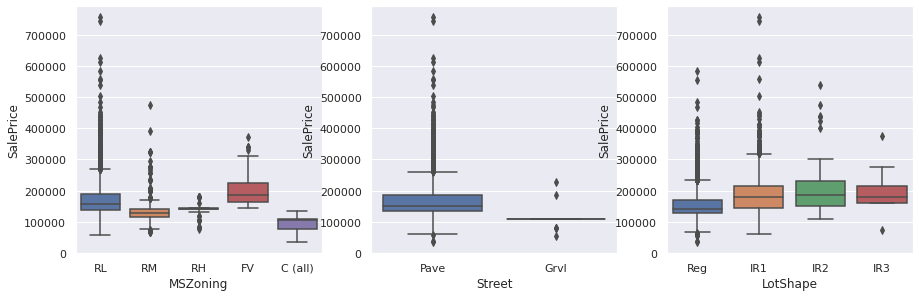

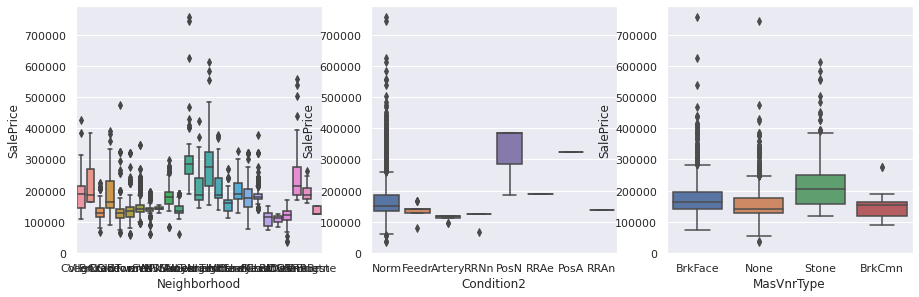

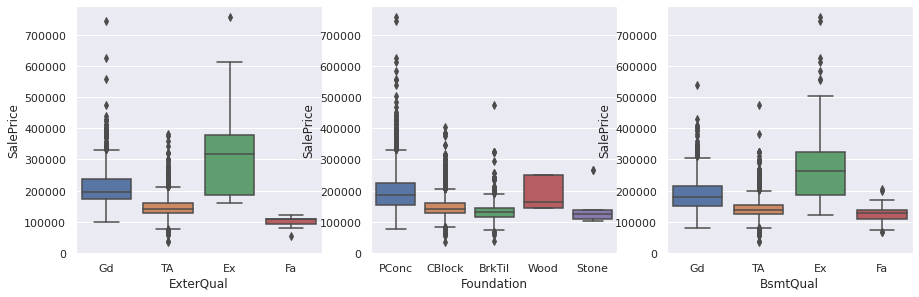

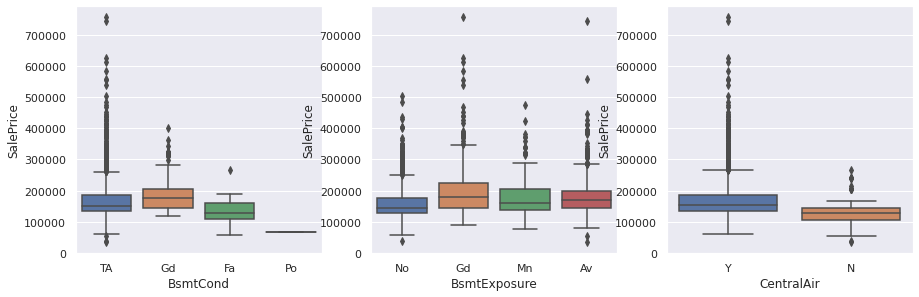

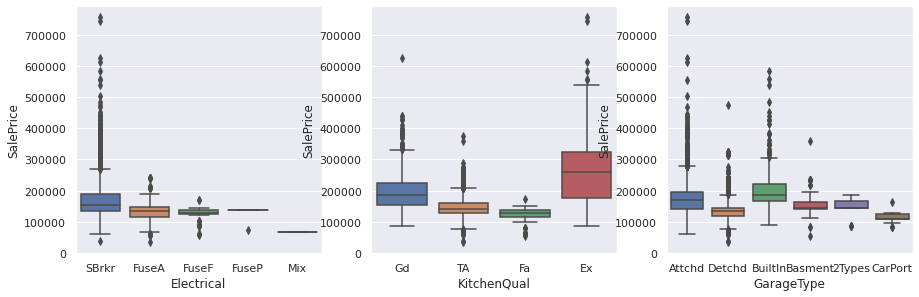

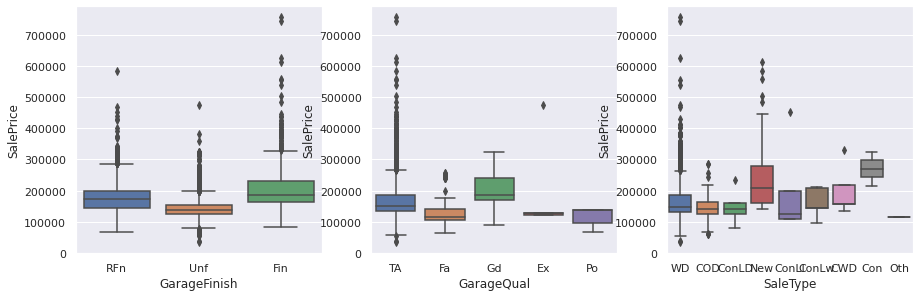

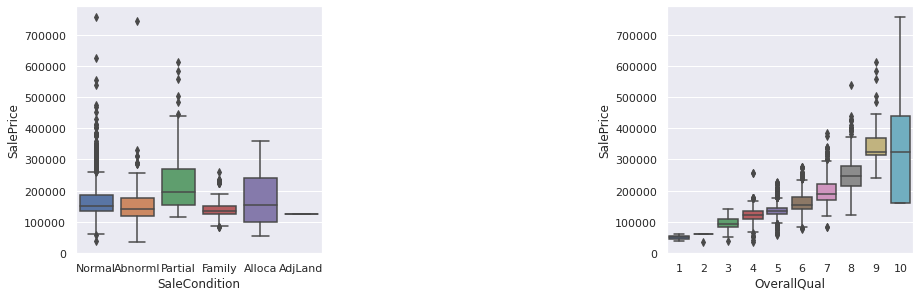

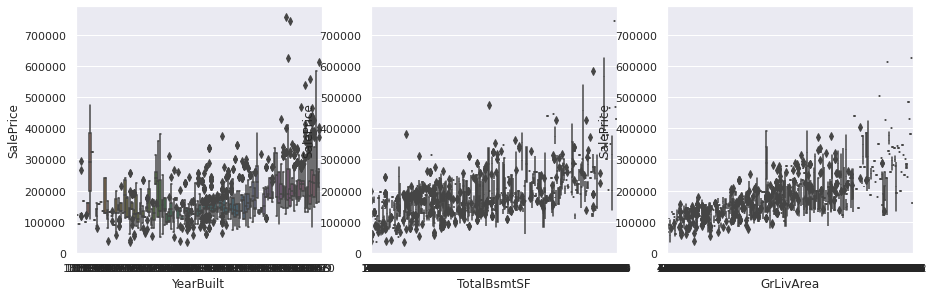

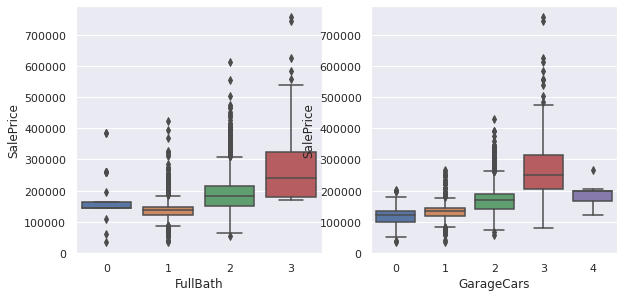

In [43]:
# Function to plot all independent categorical variables with SalePrice and count plot.
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(House.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=House, x=c, y='SalePrice', ax=ax2) #for boxplot
                        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

Thank you.